# Alibaba Cloud Server CPU Prediction

Data

In [21]:
import pandas as pd
df  = pd.read_csv("data.csv")
dataset = df.values
X = dataset[:, 3] # memory column
Y = dataset[:, 2] # cpu column
ID = dataset[:, 1] # node id column

Plotting the Data

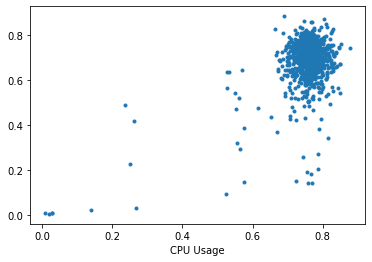

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".")
plt.xlabel("CPU Usage")
plt.show()

Model - Multi Layer Perception Neural Network

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# reshaping the X-factor from 1D to 2D
X = X.reshape(-1, 1)
# splitting the data to train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
# neural network configuration
model = MLPRegressor(random_state=1, max_iter=200, activation="relu", solver="sgd")
# relu = rectifier linear unit is an neural network activation function
# solver = optimization method
# sgd = stochastic gradient descent is an iterative method for optimizing an objective function
model.fit(X_train, Y_train)
# performing prediction on the test set and storing the predicted cpu usage in Y_predict
Y_predict = model.predict(X_test)

Plotting the Predicted CPU Usage on Test Data

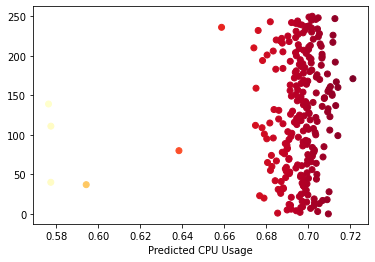

In [24]:
plt.scatter(x=Y_predict, y=list(range(0, 251)), c=X_test, cmap="YlOrRd")
plt.xlabel("Predicted CPU Usage")
plt.show()
# x-factor = index number of node id
# y-factor = predicted cpu usage of test set nodes

Node ID and their Predicted CPU Usage

In [26]:
listY_test = list(Y_test)
listID = list(ID)
listY_predict = list(Y_predict)
tmp = []
# list of node id's in the test set
for i in listY_test:
    tmp.append(listY_test.index(i))
listY_test_id = []
for i in tmp:
    listY_test_id.append(listID[i])
    
# printing node id's and their predicted cpu usage
for i, j in zip(listY_test_id, listY_predict):
    print("Node ID =", i, "Optimized CPU Usage =", j)

Node ID = b1f98eed32dcd1bcb575af5f483ab12c3b7981b7d25c6595a54de6376c381c22 Optimized CPU Usage = 0.7096161288285447
Node ID = 50f7c53d8692424fbe603c78b4e61c19276a7823df7a85f1767762054213dec7 Optimized CPU Usage = 0.6854462547140031
Node ID = 02d27a3d3bfa1b60f607ef05c14d2e37ef2fdb271e32e79ed483235a095c8010 Optimized CPU Usage = 0.6961334929901649
Node ID = b5952eee6a521b0f2b7ae15b122cc5a3714aba85cd5614ed8bf71b6f2736779f Optimized CPU Usage = 0.7045358156592614
Node ID = 2acfac3d84cd4aa3bb5d243069d18b8b2bcc8dfb84527c524ce3979287c6f056 Optimized CPU Usage = 0.6943069218769858
Node ID = 5cbd9ac26a81e868dfadf945054eb6bd8703131c99c536f8e1bc32fc257b09a9 Optimized CPU Usage = 0.6899647826907304
Node ID = f66333e4613351b2dd89e7ffdb604cb4016f34c4084ec3b8351c047d576699bc Optimized CPU Usage = 0.6919216668263536
Node ID = 1946291c5b695555122161e1bd00a4e955b32520ff3bf742cd9f52e630fb0d1d Optimized CPU Usage = 0.701163027278597
Node ID = 2d36938c8e73138710f776269a1146eab7c2f6be4f6f4a0b224b915ca295ad5